In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import joblib


In [4]:
 ## Load the dataset
df = pd.read_csv("combined_social_media_fake_jobs.csv")
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,...,job_title,company_name,job_description_length,skills_required,salary_range,job_post_age,verified_recruiter,company_website_available,job_location,fake_job
0,1.0,0.27,0.0,0.0,0.0,53.0,0.0,0.0,32.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.00,2.0,0.0,0.0,44.0,0.0,0.0,286.0,2740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.10,2.0,0.0,0.0,0.0,0.0,1.0,13.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.00,1.0,0.0,0.0,82.0,0.0,0.0,679.0,414.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.00,2.0,0.0,0.0,0.0,0.0,1.0,6.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Online Survey Agent,Freelance,64.0,5.0,141459.0,23.0,0.0,1.0,Remote,1.0
2272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Data Entry,Google,653.0,4.0,188668.0,39.0,0.0,1.0,On-site,0.0
2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Software Engineer,Tesla,729.0,4.0,165768.0,80.0,1.0,0.0,Hybrid,1.0
2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Software Engineer,Google,930.0,2.0,187387.0,15.0,1.0,1.0,On-site,0.0


 ## Data Preprocessing

In [6]:
# Fill missing values
df.fillna(0, inplace=True)


In [7]:
# Identify categorical columns and select only essential ones
essential_categorical_cols = ['Platform', 'Job_Type', 'Company_Size']  # Adjust based on dataset relevance
categorical_cols = [col for col in essential_categorical_cols if col in df.columns]

In [8]:
#Ensure categorical columns are treated as strings
df[categorical_cols] = df[categorical_cols].astype(str)

In [9]:
# Convert selected categorical variables to numerical
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
# Ensure that only relevant columns are converted to numerical values
df = pd.get_dummies(df, columns=['platform'], drop_first=True)

# Convert any remaining object columns to numeric, if appropriate
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace NaN values with 0 or any other value you deem appropriate
df.fillna(0, inplace=True)

# Verify the changes
print(df.dtypes)
print(df.head())


profile pic                  float64
nums/length username         float64
fullname words               float64
nums/length fullname         float64
name==username               float64
description length           float64
external URL                 float64
private                      float64
posts                        float64
followers                    float64
follows                      float64
fake                         float64
follow_ratio                 float64
engagement_rate              float64
connections                  float64
endorsements                 float64
skills listed                float64
private profile              float64
friends count                float64
groups joined                float64
posts shared                 float64
data_source                  float64
job_title                    float64
company_name                 float64
job_description_length       float64
skills_required              float64
salary_range                 float64
j

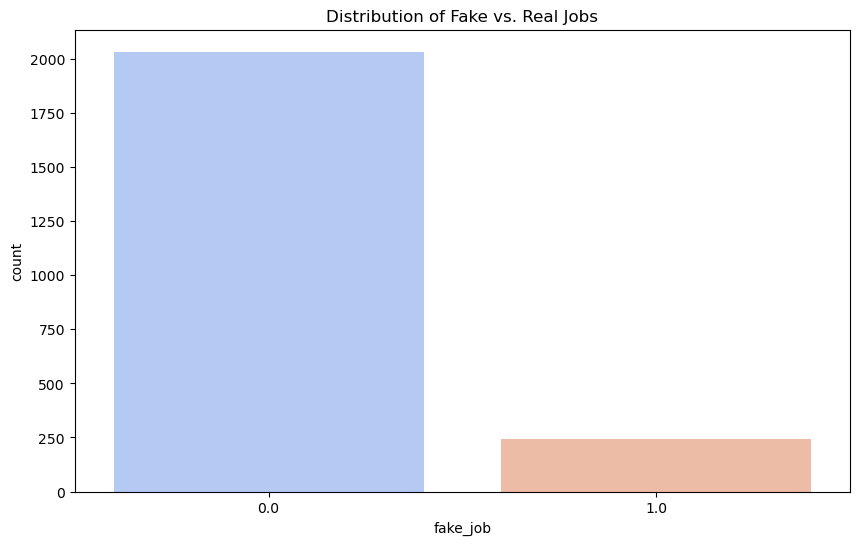

In [11]:
## Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='fake_job', data=df, palette='coolwarm')
plt.title("Distribution of Fake vs. Real Jobs")
plt.show()


C:\Users\rishi\aba\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


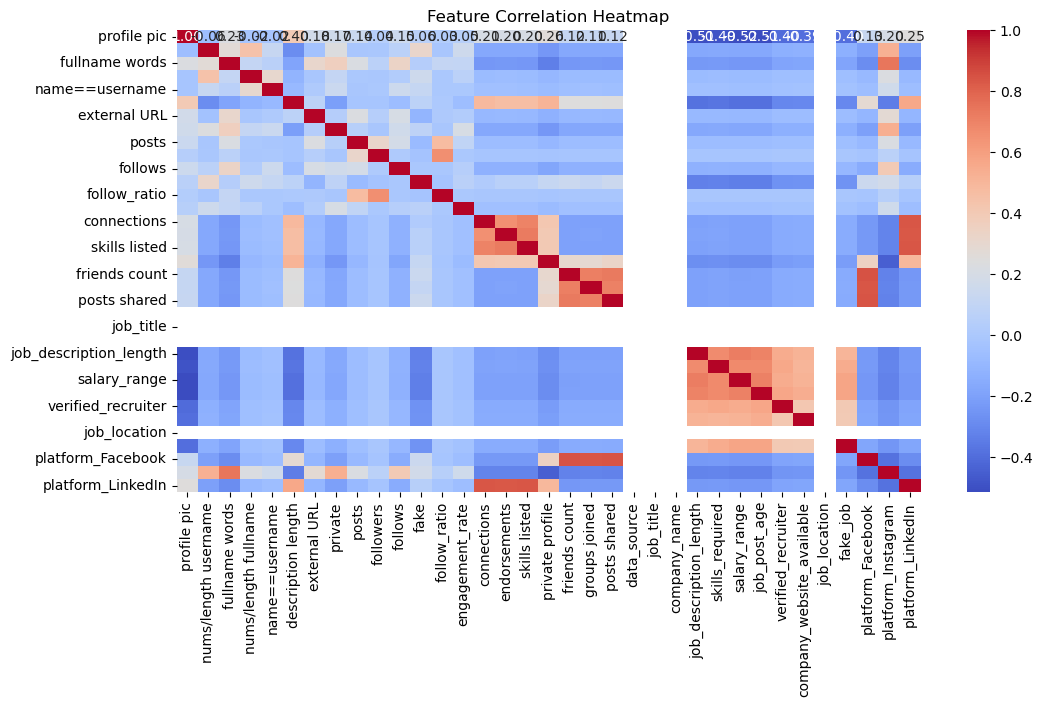

In [12]:
### Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
df.shape

(2276, 35)

In [14]:
## Splitting Data
X = df.drop(columns=['fake_job'])
y = df['fake_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
## Train a Machine Learning Model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [16]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [17]:
 ## Evaluation Metrics
print("### Accuracy:", accuracy_score(y_test, y_pred))
print("\n### Classification Report:\n", classification_report(y_test, y_pred))
print("\n### Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Accuracy: 0.8837719298245614

### Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       407
         1.0       0.45      0.37      0.40        49

    accuracy                           0.88       456
   macro avg       0.69      0.66      0.67       456
weighted avg       0.87      0.88      0.88       456


### Confusion Matrix:
 [[385  22]
 [ 31  18]]


In [18]:
 #Save the model for web integration
joblib.dump(model, 'fake_profile_detector.pkl')
joblib.dump(X.columns, 'model_features.pkl')

['model_features.pkl']

In [19]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [20]:
 ## Evaluation Metrics
print("### Accuracy:", accuracy_score(y_test, y_pred))
print("\n### Classification Report:\n", classification_report(y_test, y_pred))
print("\n### Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Accuracy: 0.8837719298245614

### Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       407
         1.0       0.45      0.37      0.40        49

    accuracy                           0.88       456
   macro avg       0.69      0.66      0.67       456
weighted avg       0.87      0.88      0.88       456


### Confusion Matrix:
 [[385  22]
 [ 31  18]]


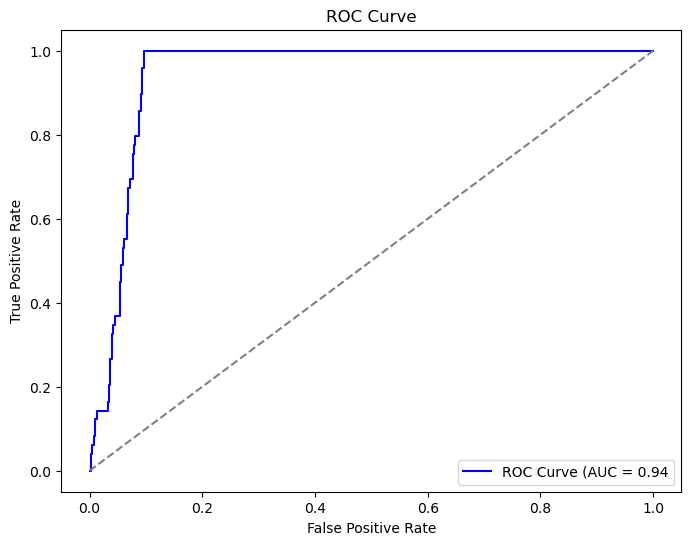

In [21]:
 ## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [22]:
## Prediction Function for Web App
def predict_fake_profile(user_input):
    """Predict whether a profile is fake or real given user input features."""
    model = joblib.load('fake_profile_detector.pkl')
    features = joblib.load('model_features.pkl')
    input_df = pd.DataFrame([user_input], columns=features)
    prediction = model.predict(input_df)[0]
    return "Fake Profile" if prediction == 1 else "Real Profile"

In [23]:
#  Example Usage
example_input = {col: 0 for col in X.columns}  # Replace with actual input values
print("Prediction:", predict_fake_profile(example_input))

Prediction: Real Profile


In [24]:
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,...,skills_required,salary_range,job_post_age,verified_recruiter,company_website_available,job_location,fake_job,platform_Facebook,platform_Instagram,platform_LinkedIn
0,1.0,0.27,0.0,0.0,0.0,53.0,0.0,0.0,32.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
1,1.0,0.00,2.0,0.0,0.0,44.0,0.0,0.0,286.0,2740.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
2,1.0,0.10,2.0,0.0,0.0,0.0,0.0,1.0,13.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
3,1.0,0.00,1.0,0.0,0.0,82.0,0.0,0.0,679.0,414.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
4,1.0,0.00,2.0,0.0,0.0,0.0,0.0,1.0,6.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,141459.0,23.0,0.0,1.0,0.0,1.0,False,False,False
2272,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,188668.0,39.0,0.0,1.0,0.0,0.0,False,False,False
2273,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,165768.0,80.0,1.0,0.0,0.0,1.0,False,False,False
2274,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,187387.0,15.0,1.0,1.0,0.0,0.0,False,False,False
